In [1]:
'''
 pip install wordcloud
 pip install jieba
 
'''
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }
 
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
        try:
            lyric = res.json()['lrc']['lyric']
            new_lyric = re.sub(r'[\d:.[\]]','',lyric)
            return new_lyric
        except:
            print('发生了异常-----------------------------------',lyric_url)
            return ''
    else:
        return ''
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger','贝斯','韩阳','吉他','黄超', '隔壁','老樊',
                  '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 
                  'Assistants', 'Mixing', 'Editing', 'Recording', 
                  '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed','北京','好听','科技'
                 ,'Music','Publishing','Davy','EMI','CYKong','Eric','黄伟文','监制']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="./wc.ttf",
#         font_path="./Symbola.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)
        print(href, '  ', name)
    return song_ids, song_names
# 设置歌手ID，毛不易为12138269
# artist_id = '12138269'
# 隔壁老樊 112429072
# 陈奕迅 2116
artist_id = '2116'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
#根据词频 生成词云
create_word_cloud(all_word)

/song?id=65766    富士山下
/song?id=551816010    我们
/song?id=65538    好久不见
/song?id=65528    淘汰
/song?id=65533    红玫瑰
/song?id=28563317    阴天快乐
/song?id=65800    最佳损友
/song?id=65536    爱情转移
/song?id=66282    浮夸
/song?id=28481103    你给我听好
/song?id=64634    一丝不挂
/song?id=64093    孤独患者
/song?id=28481818    可以了
/song?id=64561    单车(Live)
/song?id=65923    人来人往 (Live)
/song?id=65919    K歌之王 (Live)
/song?id=64293    苦瓜
/song?id=31877628    十年(Live)
/song?id=65761    白玫瑰
/song?id=27867449    倾城
/song?id=64317    因为爱情
/song?id=66285    葡萄成熟时
/song?id=64126    内疚
/song?id=64443    约定(Live)
/song?id=64922    落花流水
/song?id=64048    完
/song?id=64797    于心有愧
/song?id=25638273    梦想天空分外蓝
/song?id=65769    不如不见
/song?id=65904    十面埋伏 (Live)
/song?id=186331    最冷一天
/song?id=67572    婚礼的祝福
/song?id=64833    沙龙
/song?id=27483204    斯德哥尔摩情人
/song?id=64638    陀飞轮
/song?id=35403523    陪你度过漫长岁月
/song?id=65312    明年今日 (2007 Live)
/song?id=1376091684    相信你的人
/song?id=27483203    失忆蝴蝶
/song?id=64625    无人之境
/song

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhanggs\AppData\Local\Temp\jieba.cache


Sleep Alone
根据词频，开始生成词云!


Loading model cost 1.480 seconds.
Prefix dict has been built succesfully.


      Christopher   Chak 
     林夕 
     陈珀   /   
 Produced   by   梁荣骏 
 Production   Coordination   Stanley   Leung 
 Arrangement ,   s   &   Programming   陈珀   /   
 Drums     Chan 
 Bass   细威 
 Guitar   Joey   Tang 
 Percussion     Chan   &   Kevin   ( Hardpack ) 
 Strings   Arranged   &   Conducted   by   陈珀 
 Recorded   at   aroom   studio   &   seewisehk , 
 Engineered   by     Chan ,   Rob   Porter   &   CY   Kong 
 s   Recorded   at   Avon   Studios , 
 Engineered   by   Anthony   Leung 
 Mixed   by   Simon   Li   at   nOiz 
 OP   Forward       Co   Ltd   /         ( SE   Asia )   Ltd ,   Taiwan   Branch 
 SP         HK 
 拦路 雨 偏似 雪花 
 饮泣 的 你 冻 吗 
 这 风褛 我 给 你 磨 到 有襟花 
 连调 了 职 也 不怕 
 怎么 始终 牵挂 
 苦心 选中 今天 想车 你 回家 
 原谅 我 不再 送花 
 伤口 应要 结疤 
 花瓣 铺满 心里 坟场 才 害怕 
 如若 你 非 我 不 嫁 
 彼此 终必 火化 
 一生一世 等 一天 需要 代价 
 谁 都 只得 那 双手 
 靠 拥抱 亦 难任 你 拥有 
 要 拥有 必先 懂 失去 怎 接受 
 曾 沿着 雪路 浪游 
 为何 为 好事 泪流 
 谁 能 凭 爱意 要 富士山 私有 
 何不 把 悲哀 感觉 
 假设 是 来自 你 虚构 
 试管 里 找 不到 它 染污 眼眸 
 前尘 硬化 像 石头 
 随缘 地 抛 下 便 逃走 
 
 我 绝不 罕有 

根据词频，开始生成词云!
图书 在 版 编目 （ CIP ） 数据 沃顿 商学院 最 受欢迎 的 成功 课   / （ 美 ） 格兰特 著 ； 王非译 .   — — ： 中信 出版社 ， 2015.1 书名 原文 ： Give     Take :   A   Revolutionary   Approach   to   SuccessISBN   978 – 7 – 5086 – 4602 – 2I .   ① 沃 …   II .   ① 格 …   ② 王 …   III .   ① 成功 心理 － 通俗读物 IV .   ① B848.4 - 49 中国 版本 图书馆 CIP 数据 核字 （ 2014 ） 第 135938 号 Give     Take :   A   Revolutionary   Approach   to   Success   by   Adam   GrantCopyright   ©   2013   by   Adam   GrantThis   edition   arranged   with   InkWell   Management ,   LLCthrough   Andrew   Nurnberg   Associates   International   LimitedSimplified   Chinese   translation   copyright   ©   2015   by   CITIC   Press   CorporationALL   RIGHTS   RESERVED 本书 仅限 中国 大陆 地区 销售 沃顿 商学院 最 受欢迎 的 成功 课 著者 ： [ 美 ]   亚当 · 格兰特 译者 ： 王非 策划 推广 ： 中信 出版社 （ China   CITIC   Press ） 出版 ： 中信 出版 集团股份 有限公司 （ 市 朝阳区 惠新东街 甲 4 号 富盛 大厦 2 座   邮编 100029 ） （ CITIC     Group ） 承印 者 ： 诚信 伟业 印刷 有限公司 电子书 排版 ： 张明霞 中信 出版社 官网 ： http : / / www . publish . citic . com / 官方 微博 ： http : / / weibo . com

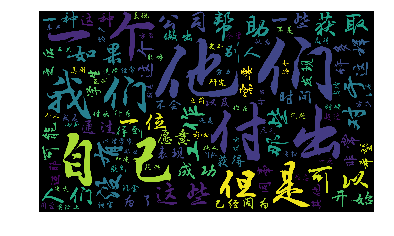

In [5]:
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

all_word =''
with open("giveandtake.txt", encoding='utf-8') as f:
    while True:
        line=f.readline()
        if not line:
            break;
        all_word += line.rstrip()
#         print(line.rstrip())

def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger','贝斯','韩阳','吉他','黄超', '隔壁','老樊',
                  '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 
                  'Assistants', 'Mixing', 'Editing', 'Recording', 
                  '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed','北京','好听','科技'
                 ,'Music','Publishing','Davy','EMI','CYKong','Eric','黄伟文','监制']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
        
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="./wc.ttf",
#         font_path="./Symbola.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("takeandgive.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

create_word_cloud(all_word)